Libraries and Style Files
-------------------------

In [6]:
#we may need some code in the ../python directory and/or matplotlib styles
import sys
sys.path.append('../python/')

#matplotlib for plotting
import matplotlib as mpl
from matplotlib import pyplot as plt
plt.style.use('../mplstyles/stylelib/standard.mplstyle')

import numpy as np
import importlib

Comparing to the Neutron-Nucleus Process
========================================

Converting to keV$_{\mathrm{nr}}$
---------------------------------

In [18]:
#create a yield model
import lindhard as lind
importlib.reload(lind)

#lindhard
lpar = lind.getLindhardPars('Si',True) #use the "calculated" value of k
print(lpar)
ylind = lind.getLindhard(lpar)
ylind = lind.getLindhardSi_k(0.15)
yplind = lind.getYPrimeLindhard(par=lpar)
ylindv = np.vectorize(ylind) #careful, this expects inputs in eV
yplindv = np.vectorize(yplind) #careful, this expects inputs in eV

{'Z': 14, 'A': 28, 'k': 0.14600172346755985, 'a': 3.0, 'b': 0.15, 'c': 0.7, 'd': 0.6}


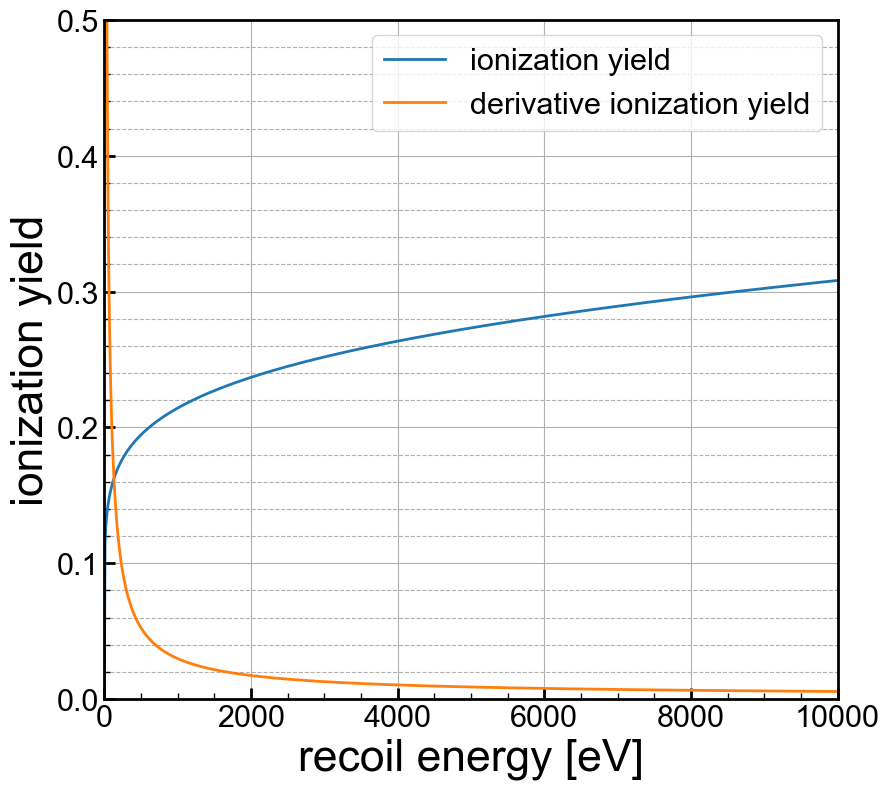

In [19]:
#set up a 1d plot
fig,axes = plt.subplots(1,1,figsize=(9.0,8.0),sharex=True)
ax1 = axes

Er= np.linspace(0.0, 10000, 1000)

#print(estring)
#ax1.plot(Er, dRlow,label='low res')
ax1.plot(Er, ylindv(Er),label="ionization yield")
ax1.plot(Er, yplindv(Er),label="derivative ionization yield")



ymin = 0.0
ymax = 0.5

blue = '#118DFA'
#ax1.fill_between(xcq,np.zeros(np.shape(xcq)),thist,step='mid',facecolor='b',alpha=0.4, \
#                 label='')

plt.grid()
#ax1.set_yscale('linear')
#ax1.set_yscale('log')
ax1.set_xlim(0, 10000) 
ax1.set_ylim(ymin,ymax)
ax1.set_xlabel(r'recoil energy [eV]')
ax1.set_ylabel('ionization yield')
ax1.grid(True)
ax1.yaxis.grid(True,which='minor',linestyle='--')
ax1.legend(loc=1,prop={'size':22})
#ax1.legend(bbox_to_anchor=(1.04,1),borderaxespad=0,prop={'size':22})

for axis in ['top','bottom','left','right']:
  ax1.spines[axis].set_linewidth(2)

plt.tight_layout()
#plt.savefig('figures/ne-recspec-Eee.png')
plt.show()